In [66]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt



# Load the dataset we generated earlier
df = pd.read_csv("data/online_store_logit.csv")
df = df.drop(columns=['previous_customer'])
df.head()

,user_id,gender,time_on_site_min,ads_seen,bought
0,1,Male,6.00,3,1
1,2,Female,3.60,6,0
2,3,Female,4.58,1,1
3,4,Male,0.14,1,0
4,5,Male,2.15,3,0


In [67]:
# Prepare independent variables (X) and dependent variable (y)
X = pd.get_dummies(df[["gender", "time_on_site_min", "ads_seen"]], drop_first=True, dtype='int')
X = sm.add_constant(X)
y = df["bought"]
X.head()

,const,time_on_site_min,ads_seen,gender_Male
0,1.0,6.00,3,1
1,1.0,3.60,6,0
2,1.0,4.58,1,0
3,1.0,0.14,1,1
4,1.0,2.15,3,1


In [68]:
# Fit logistic regression model
model = sm.Logit(y, X).fit()

# Display the full summary report
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.591208
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 bought   No. Observations:                 1200
Model:                          Logit   Df Residuals:                     1196
Method:                           MLE   Df Model:                            3
Date:                Tue, 14 Oct 2025   Pseudo R-squ.:                  0.1164
Time:                        17:16:03   Log-Likelihood:                -709.45
converged:                       True   LL-Null:                       -802.94
Covariance Type:            nonrobust   LLR p-value:                 2.731e-40
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.2045      0.229     -9.620      0.000      -2.654      -1.755
time_on_sit

In [69]:
d = dict()
d['coefs'] = model.params

param_df = pd.DataFrame.from_dict(d).reset_index()
param_df['odds_ratio'] = np.exp(param_df['coefs'])
param_df['p-value'] = [0.0,0.0,0.0,0.88]
param_df.round(2)

,index,coefs,odds_ratio,p-value
0,const,-2.20,0.11,0.00
1,time_on_site_min,0.48,1.61,0.00
2,ads_seen,0.30,1.35,0.00
3,gender_Male,-0.02,0.98,0.88


Optimization terminated successfully.
         Current function value: 0.599580
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 bought   No. Observations:                  900
Model:                          Logit   Df Residuals:                      896
Method:                           MLE   Df Model:                            3
Date:                Tue, 14 Oct 2025   Pseudo R-squ.:                 0.09857
Time:                        16:27:54   Log-Likelihood:                -539.62
converged:                       True   LL-Null:                       -598.63
Covariance Type:            nonrobust   LLR p-value:                 2.069e-25
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.9182      0.259     -7.408      0.000      -2.426      -1.411
time_on_sit

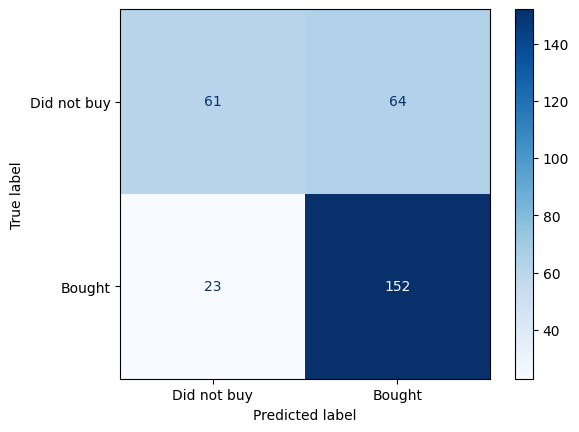

In [28]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Prepare data
X = pd.get_dummies(df[["gender", "time_on_site_min", "ads_seen"]], drop_first=True, dtype='int')
y = df["bought"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Fit statsmodels Logit model
X_train_sm = sm.add_constant(X_train)
model = sm.Logit(y_train, X_train_sm).fit()

# Display model summary
print(model.summary())

# Predict on test set
X_test_sm = sm.add_constant(X_test)
y_pred_prob = model.predict(X_test_sm)
y_pred = (y_pred_prob >= 0.5).astype(int)

# Compute metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("\n--- MODEL EVALUATION ---")
print(f"Accuracy:  {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall:    {rec:.3f}")
print(f"F1 Score:  {f1:.3f}")
print("\nConfusion Matrix:\n", cm)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Did not buy", "Bought"])
disp.plot(cmap="Blues", values_format='d')
plt.show()

In [ ]:
# Generate a simple synthetic dataset for logistic regression and verify significance
import numpy as np
import pandas as pd
import statsmodels.api as sm
# from caas_jupyter_tools import display_dataframe_to_user
# Save to CSV
csv_path = "data/online_store_logit.csv"
df.to_csv(csv_path, index=False)

# Verify with logistic regression (statsmodels)
# One-hot encode gender, include Male as indicator (Female as baseline)
# X = pd.get_dummies(df[["gender", "time_on_site_min", "ads_seen", "previous_customer"]], drop_first=True, dtype='int')
X = pd.get_dummies(df[["gender", "time_on_site_min", "ads_seen"]], drop_first=True, dtype='int')
X = sm.add_constant(X)
y = df["bought"]

model = sm.Logit(y, X).fit(disp=False)
summary_text = model.summary()

# Show a small preview of the dataset for the user
# display_dataframe_to_user("Online Store — Logistic Regression Teaching Dataset (preview)", df.head(20))
print(summary_text)

# model.summary()

                           Logit Regression Results                           
Dep. Variable:                 bought   No. Observations:                 1200
Model:                          Logit   Df Residuals:                     1196
Method:                           MLE   Df Model:                            3
Date:                Tue, 14 Oct 2025   Pseudo R-squ.:                  0.1164
Time:                        16:19:16   Log-Likelihood:                -709.45
converged:                       True   LL-Null:                       -802.94
Covariance Type:            nonrobust   LLR p-value:                 2.731e-40
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.2045      0.229     -9.620      0.000      -2.654      -1.755
time_on_site_min     0.4752      0.044     10.762      0.000       0.389       0.562
ads_seen             0.2991 

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 bought   No. Observations:                 1200
Model:                          Logit   Df Residuals:                     1196
Method:                           MLE   Df Model:                            3
Date:                Tue, 14 Oct 2025   Pseudo R-squ.:                  0.1164
Time:                        16:19:16   Log-Likelihood:                -709.45
converged:                       True   LL-Null:                       -802.94
Covariance Type:            nonrobust   LLR p-value:                 2.731e-40
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.2045      0.229     -9.620      0.000      -2.654      -1.755
time_on_site_min     0.4752      0.044     10.762      0.000       0.389       0.562
ads_seen             0.2991      0.040      7.519      0.000       0.221       0.377
gender_Male         -0.0180      0.128     -0.141      0.888      -0.269       0.233
====================================================================================
"""

In [ ]:
# import numpy as np
# import pandas as pd
# import statsmodels.api as sm
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
# import matplotlib.pyplot as plt

# # Recreate the same dataset
# rng = np.random.default_rng(42)
# n = 1200

# gender = rng.choice(["Male", "Female"], size=n)
# time_on_site_min = np.clip(rng.normal(4.0, 1.6, size=n), 0, None)
# ads_seen = rng.poisson(3.0, size=n)
# previous_customer = rng.binomial(1, 0.35, size=n)

# beta_0 = -3.0
# beta_time = 0.55
# beta_ads = 0.28
# beta_prev = 2.0
# gender_code = (gender == "Male").astype(int)

# log_odds = beta_0 + 0.0 * gender_code + beta_time * time_on_site_min + beta_ads * ads_seen + beta_prev * previous_customer
# p = 1 / (1 + np.exp(-log_odds))
# bought = rng.binomial(1, p)

# df = pd.DataFrame({
#     "gender": gender,
#     "time_on_site_min": np.round(time_on_site_min, 2),
#     "ads_seen": ads_seen,
#     "previous_customer": previous_customer,
#     "bought": bought
# })
# df.to_csv('data/online_sales.csv', index=False)

# # Prepare data
# X = pd.get_dummies(df[["gender", "time_on_site_min", "ads_seen", "previous_customer"]], drop_first=True)
# y = df["bought"]

# # Split into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# # Fit statsmodels Logit model
# X_train_sm = sm.add_constant(X_train)
# model = sm.Logit(y_train, X_train_sm).fit()

# # Display model summary
# print(model.summary())

# # Predict on test set
# X_test_sm = sm.add_constant(X_test)
# y_pred_prob = model.predict(X_test_sm)
# y_pred = (y_pred_prob >= 0.5).astype(int)

# # Compute metrics
# acc = accuracy_score(y_test, y_pred)
# prec = precision_score(y_test, y_pred)
# rec = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)
# cm = confusion_matrix(y_test, y_pred)

# # Print evaluation metrics
# print("\n--- MODEL EVALUATION ---")
# print(f"Accuracy:  {acc:.3f}")
# print(f"Precision: {prec:.3f}")
# print(f"Recall:    {rec:.3f}")
# print(f"F1 Score:  {f1:.3f}")
# print("\nConfusion Matrix:\n", cm)

# # Plot confusion matrix
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Did not buy", "Bought"])
# disp.plot(cmap="Blues", values_format='d')
# plt.show()


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).